In [28]:
# Importing libraries, get structure,print head and reasign College to df
library(ISLR)
library(ggplot2)
library("rpart")
library("rpart.plot")
library("randomForest")
library(caTools)
str(College)
print(head(College))
df <- College

Warning message:
"package 'caTools' was built under R version 4.4.1"


'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

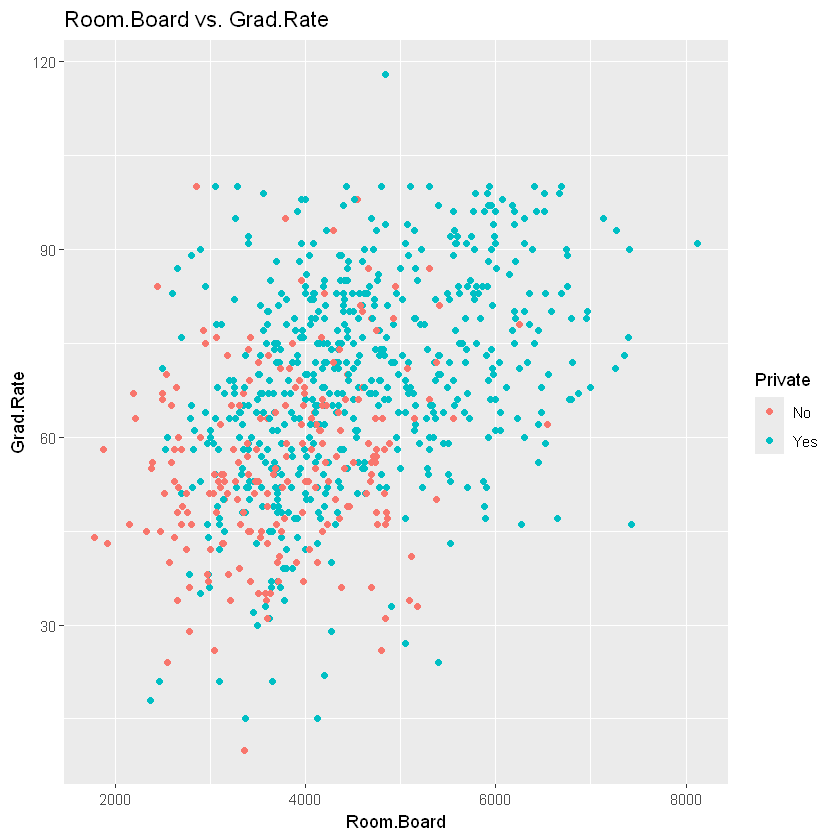

In [14]:
# Scatter plot of Room.Board vs. Grad.Rate
ggplot(df, aes(Room.Board, Grad.Rate)) +
    geom_point(aes(color = Private)) +
    ggtitle("Room.Board vs. Grad.Rate")

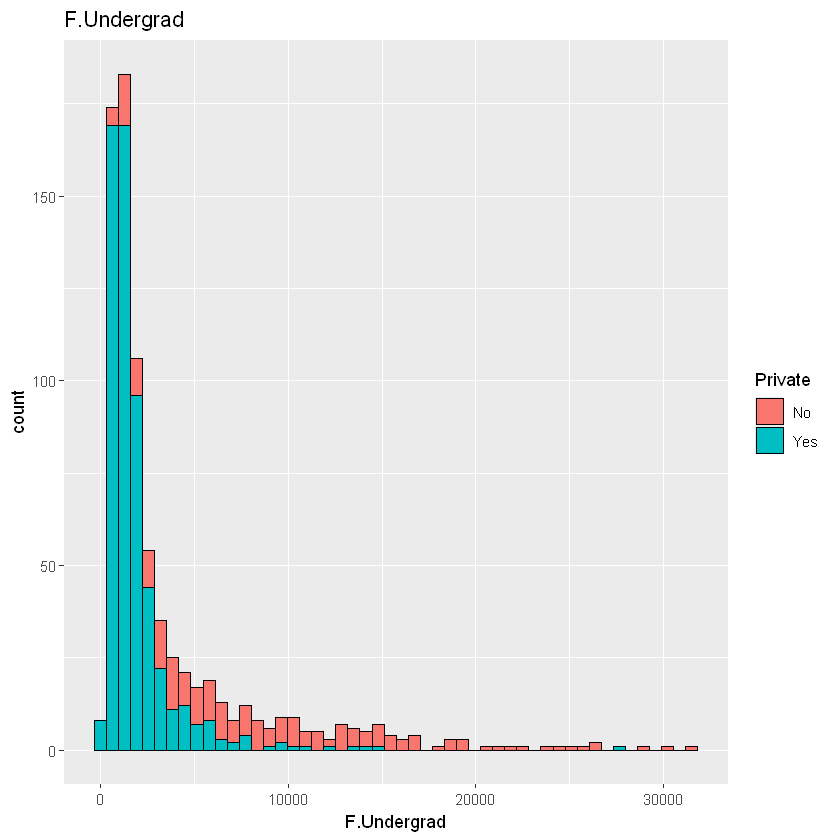

In [19]:
# Histogram of F.Undergrad
ggplot(df, aes(F.Undergrad)) +
    geom_histogram(bins = 50, color="black", aes(fill = Private)) +
    ggtitle("F.Undergrad")

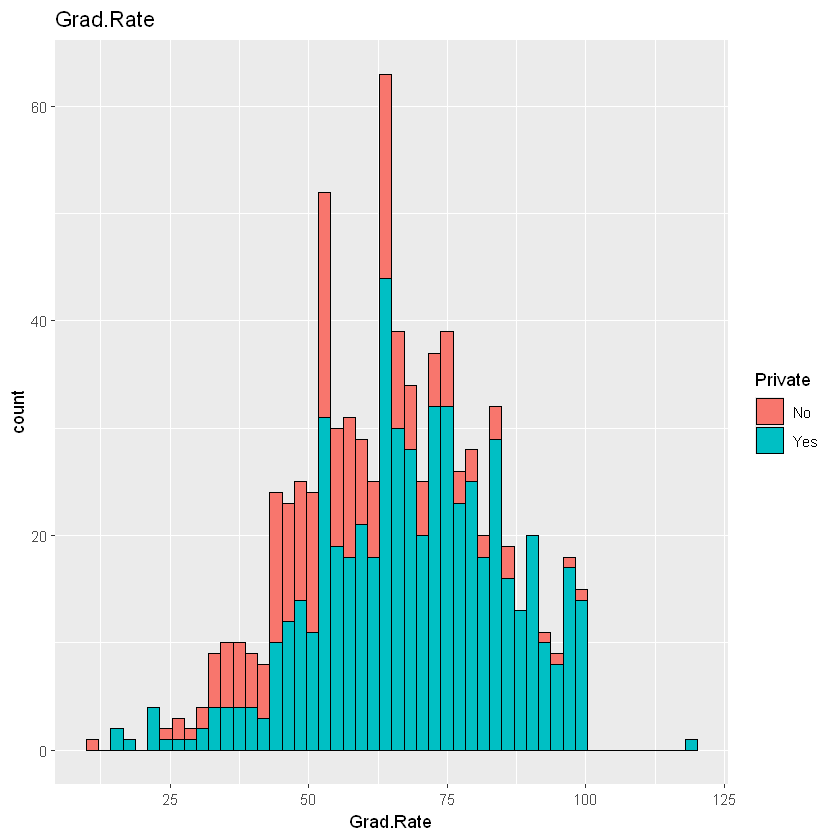

In [20]:
# Histogram of Grad.Rate
ggplot(df, aes(Grad.Rate)) +
    geom_histogram(bins = 50, color = "black", aes(fill = Private)) +
    ggtitle("Grad.Rate")
# A college has a Grad.Rate > 100, need to investigate

In [26]:
print(subset(df, Grad.Rate > 100))
# Cazenovia College needs to have its Grad.Rate set to 100

                  Private Apps Accept Enroll Top10perc Top25perc F.Undergrad
Cazenovia College     Yes 3847   3433    527         9        35        1010
                  P.Undergrad Outstate Room.Board Books Personal PhD Terminal
Cazenovia College          12     9384       4840   600      500  22       47
                  S.F.Ratio perc.alumni Expend Grad.Rate
Cazenovia College      14.3          20   7697       118


In [27]:
# Change Cazenovia College's Grad.Rate to 100
df["Cazenovia College", "Grad.Rate"] <- 100
print(subset(df, Grad.Rate >= 100))

                                Private  Apps Accept Enroll Top10perc Top25perc
Amherst College                     Yes  4302    992    418        83        96
Cazenovia College                   Yes  3847   3433    527         9        35
College of Mount St. Joseph         Yes   798    620    238        14        41
Grove City College                  Yes  2491   1110    573        57        88
Harvard University                  Yes 13865   2165   1606        90       100
Harvey Mudd College                 Yes  1377    572    178        95       100
Lindenwood College                  Yes   810    484    356         6        33
Missouri Southern State College      No  1576   1326    913        13        50
Santa Clara University              Yes  4019   2779    888        40        73
Siena College                       Yes  2961   1932    628        24        68
University of Richmond              Yes  5892   2718    756        46        72
                                F.Underg

In [30]:
# Split data into train and test with a 70/30 split
set.seed(101)
sample <- sample.split(df$Private, SplitRatio = 0.7)
train <- subset(df, sample == TRUE)
test <- subset(df, sample == FALSE)

n= 544 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 544 148 Yes (0.272058824 0.727941176)  
    2) F.Undergrad>=2992.5 164  46 No (0.719512195 0.280487805)  
      4) Outstate< 10218.5 112   4 No (0.964285714 0.035714286) *
      5) Outstate>=10218.5 52  10 Yes (0.192307692 0.807692308)  
       10) Accept>=5934 12   4 No (0.666666667 0.333333333) *
       11) Accept< 5934 40   2 Yes (0.050000000 0.950000000) *
    3) F.Undergrad< 2992.5 380  30 Yes (0.078947368 0.921052632)  
      6) Outstate< 7935 78  29 Yes (0.371794872 0.628205128)  
       12) F.Undergrad>=947 54  27 No (0.500000000 0.500000000)  
         24) Top10perc< 9.5 9   0 No (1.000000000 0.000000000) *
         25) Top10perc>=9.5 45  18 Yes (0.400000000 0.600000000)  
           50) P.Undergrad>=187.5 28  12 No (0.571428571 0.428571429)  
            100) Enroll< 469.5 20   6 No (0.700000000 0.300000000) *
            101) Enroll>=469.5 8   2 Yes (0.250000000 0.750000000) *
           5

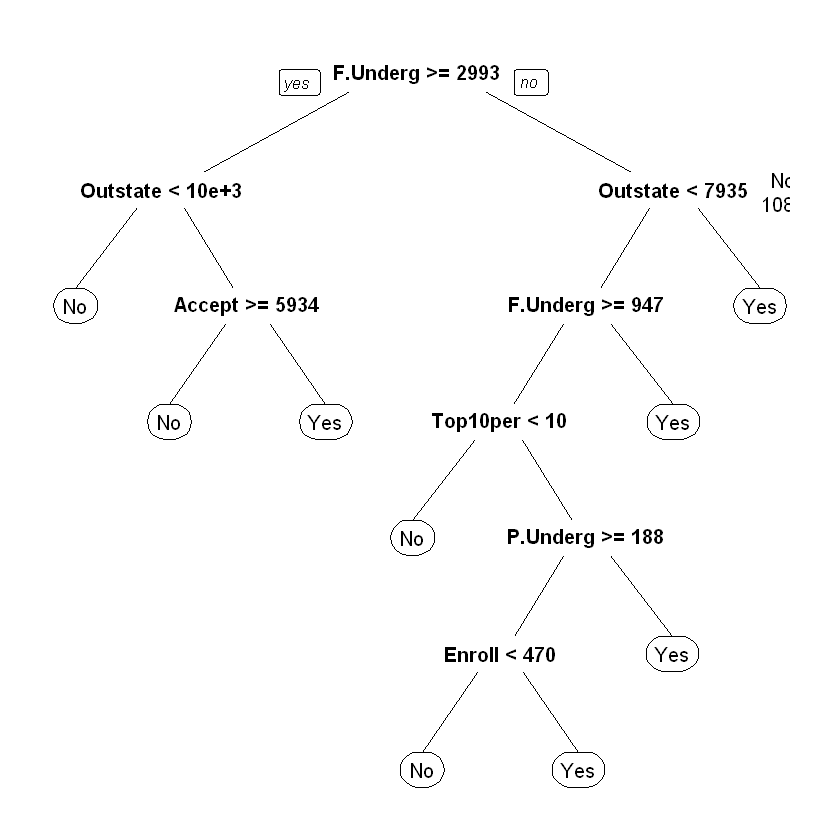

In [33]:
# Build tree using rpart and train data
tree <- rpart(formula = Private ~ ., data = train, method = "class")
print(tree)
prp(tree)
text(tree, use.n = T, all = T)
printcp(tree)

In [36]:
# use the predict function to make predictions on the test data for private or not.
tree.pred <- predict(tree, test)
print(head(tree.pred))

                                                 No       Yes
Adrian College                          0.003311258 0.9966887
Alfred University                       0.003311258 0.9966887
Allegheny College                       0.003311258 0.9966887
Allentown Coll. of St. Francis de Sales 0.003311258 0.9966887
Alma College                            0.003311258 0.9966887
Amherst College                         0.003311258 0.9966887


In [41]:
# Turn these two columns into one column to match the original Yes/No Label for a Private column.
tree.pred <- as.data.frame(tree.pred)
joiner <- function(x) {
    if (x >= 0.5) {
        return("Yes")
    } else {
        return("No")
    }
}
tree.pred$Private <- sapply(tree.pred$Yes, joiner)
print(head(tree.pred))
table(tree.pred$Private, test$Private)


                                                 No       Yes Private
Adrian College                          0.003311258 0.9966887     Yes
Alfred University                       0.003311258 0.9966887     Yes
Allegheny College                       0.003311258 0.9966887     Yes
Allentown Coll. of St. Francis de Sales 0.003311258 0.9966887     Yes
Alma College                            0.003311258 0.9966887     Yes
Amherst College                         0.003311258 0.9966887     Yes


     
       No Yes
  No   57   9
  Yes   7 160

In [46]:
# Build random forest model and look at confusion matrix and feature importance
model <- randomForest(formula = Private ~ ., data = train, importance = TRUE)
print(model$confusion)
print(model$importance)

     No Yes class.error
No  125  23  0.15540541
Yes  11 385  0.02777778
                     No          Yes MeanDecreaseAccuracy MeanDecreaseGini
Apps        0.028170446 0.0148398152          0.018356785         9.858231
Accept      0.027641368 0.0164341215          0.019465516        11.951374
Enroll      0.037321098 0.0270832366          0.029785903        22.217095
Top10perc   0.010681696 0.0048732821          0.006430849         5.544644
Top25perc   0.006433991 0.0044138595          0.004931172         4.440015
F.Undergrad 0.146574381 0.0677716876          0.088891710        40.986945
P.Undergrad 0.047104108 0.0052589881          0.016633667        16.187708
Outstate    0.150347003 0.0619354040          0.085733247        43.322105
Room.Board  0.017547542 0.0145100846          0.015333987        11.416475
Books       0.003098708 0.0002773838          0.001056442         2.299576
Personal    0.003044369 0.0013674588          0.001837170         3.769753
PhD         0.009278420 0.00

In [48]:
# use random forest to make predictions on the test data
p <- predict(model, test)
table(p, test$Private)

     
p      No Yes
  No   56   5
  Yes   8 164